# Проверка гипотез интернет-магазина


Совместно с отделом маркетинга интернет - магазина был подготовлен список гипотез для увеличения выручки.

В настоящем исследовании будет назначен приоритет имеющимся гипотезам, а также проведен анализ А/В – теста с целью оценки эффективности внедрения изменений для последующего увеличения выручки.


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math as mth
import datetime as dt
from datetime import datetime
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
pd.set_option('max_colwidth', 200)

## Приоритезация гипотез.

In [2]:
hyp = pd.read_csv('/datasets/e_com_hypothesis.csv')

In [3]:
display(hyp.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hyp['ICE'] = round((hyp['Impact'] * hyp ['Confidence']) / hyp['Efforts'], 2)

display(hyp.sort_values(by = 'ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<div class="alert alert-info"> <b>Комментарий студента:</b> Округлил. </div>

In [6]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp ['Confidence']) / hyp['Efforts']

display(hyp.sort_values(by = 'RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Выше была осуществлена оценка приоритетов гипотез методами ICE и RICE, и применена сортировка по убыванию приоритета. При этом, после применения метода RICE порядок сортировки изменился, так как к расчету был добавлен параметр Reach - охват пользователей, соответственно, больший приоритет получили гипотезы, предполагающие больший охват.



## Анализ A/B-теста

### Изучим и подготовим данные

In [7]:
orders = pd.read_csv('/datasets/e_com_orders.csv')
visitors = pd.read_csv('/datasets/e_com_visitors.csv')

In [8]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Приведем данные в формат даты**

In [12]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

**Проверим пропуски и дубликаты**

In [13]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
orders.duplicated().sum()

0

In [16]:
visitors.duplicated().sum()

0

Пропусков и дубликатов нет

In [17]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [18]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [19]:
orders['date'].max(), orders['date'].min()

(datetime.date(2019, 8, 31), datetime.date(2019, 8, 1))

In [20]:
visitors['date'].max(), visitors['date'].min()

(datetime.date(2019, 8, 31), datetime.date(2019, 8, 1))

In [21]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group > 1').count()

group    58
dtype: int64

В таблице с заказами имеется 58 пользователей, попавших в обе группы. Для их исключения, требуется внести изменения и в таблицу с посещениями, что в настоящее время не представляется возможным. В связи с этим, учитывая незначительное количество пользователей, принято решение оставить их в таблице.

### Построим график кумулятивной выручки по группам.

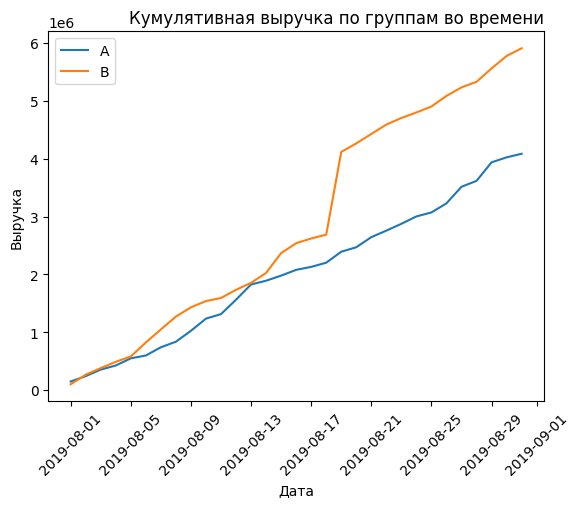

In [22]:
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Кумулятивная выручка по группам во времени", loc = 'right')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend();

В середине теста в группе В резко увеличилась выручка и продолжала значительно расти по сравнению с А. Вероятно всплеску способствовали аномально высокие суммы заказов, что будет подробнее изучено далее.

### Построим график кумулятивного среднего чека по группам

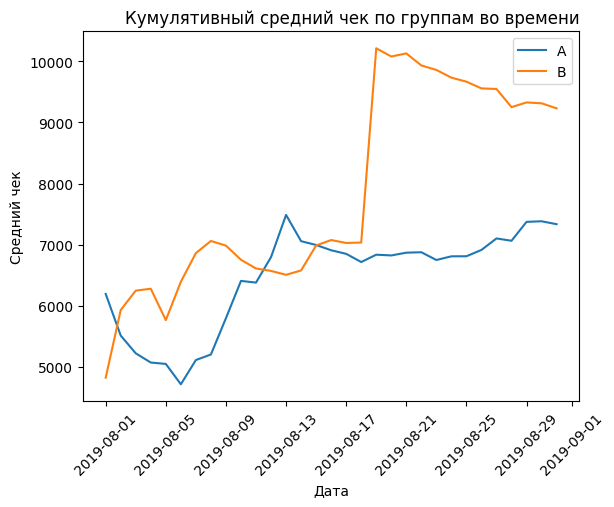

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title("Кумулятивный средний чек по группам во времени", loc = 'right')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.legend();

На графике видны значительные колебания. В группе В в середине теста средний чек резко увеличивается. Вероятно это связано с выбросами. Выводы будут сделаны после их анализа.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

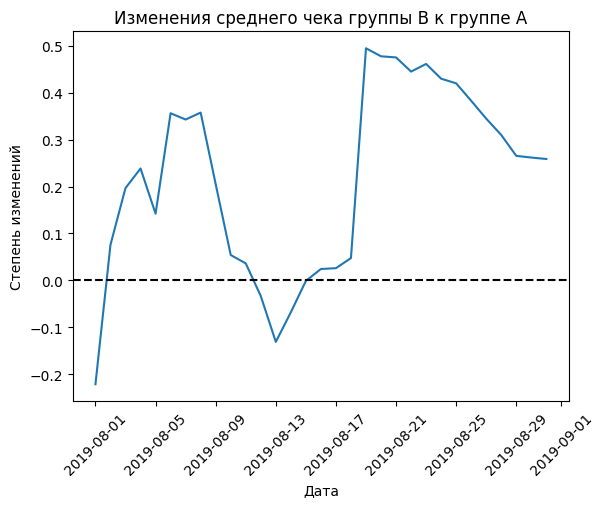

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title("Изменения среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Степень изменений")
plt.xticks(rotation=45);

На графике видно несколько вспелесков кумулятивного среднего чека в группе В по отношению к группе А. Предположительно в дни всплесков были сделаны аномальные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

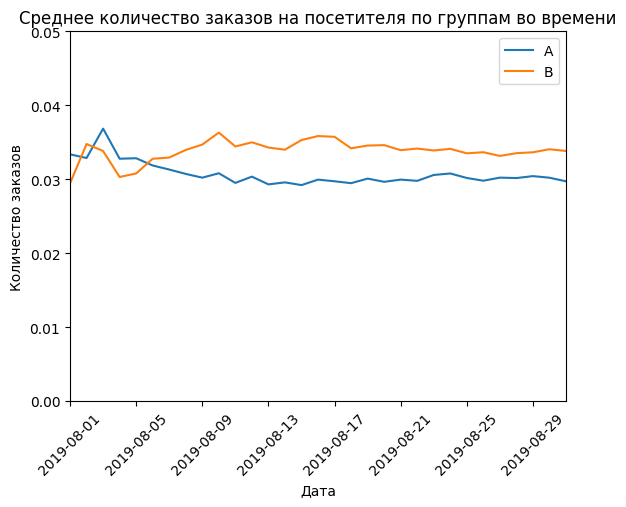

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title("Среднее количество заказов на посетителя по группам во времени")
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45);
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]);

В начале теста группа А имела большее количество заказов на посетителя, но в дальнейшем в группе В количество заказов выросло и стабильно было выше чем в А.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

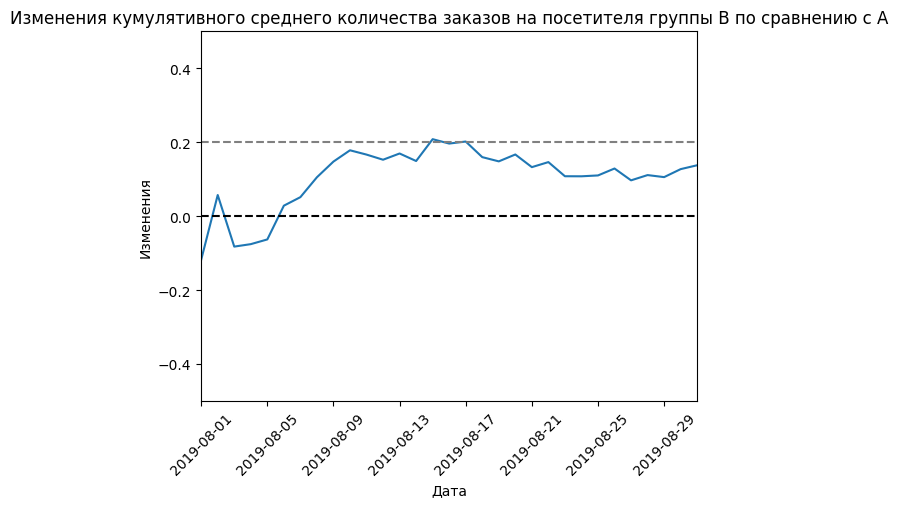

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.5])

plt.title("Изменения кумулятивного среднего количества заказов на посетителя группы B по сравнению с A")
plt.xlabel("Дата")
plt.ylabel("Изменения")
plt.xticks(rotation=45);

В начале теста кумулятивное среднее количество заказов на посетителя в группе В по сравнению с А колебалась ниже, но в дальнейшем стало расти и стабилизировалась выше А на 20 %.

### Построим точечный график количества заказов по пользователям

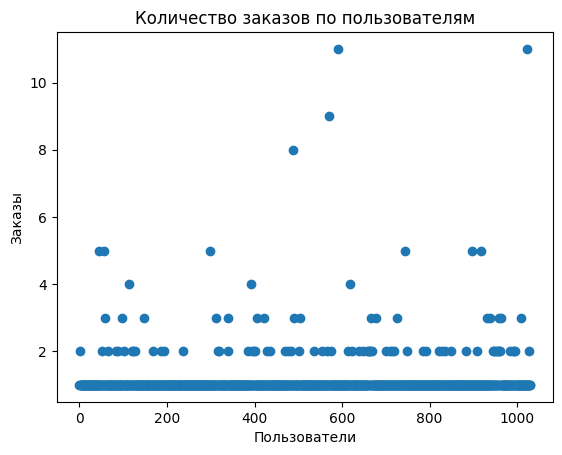

In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title("Количество заказов по пользователям")
plt.xlabel("Пользователи")
plt.ylabel("Заказы");

В основном пользователи совершают не более 2 заказов. Имеется небольшое количество пользователей, совершающих больше заказов (чем больше заказов, тем меньше пользователей).

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5 % пользователей совершали заказы более 2 раз и не более 1 % - 4 и больше. Для исключения аномальных явлений допустимо избавиться от 5 % значений. Соответственно, в последующем избавимся от пользователей, совершивших более 2 заказов.

### Построим точечный график стоимостей заказов

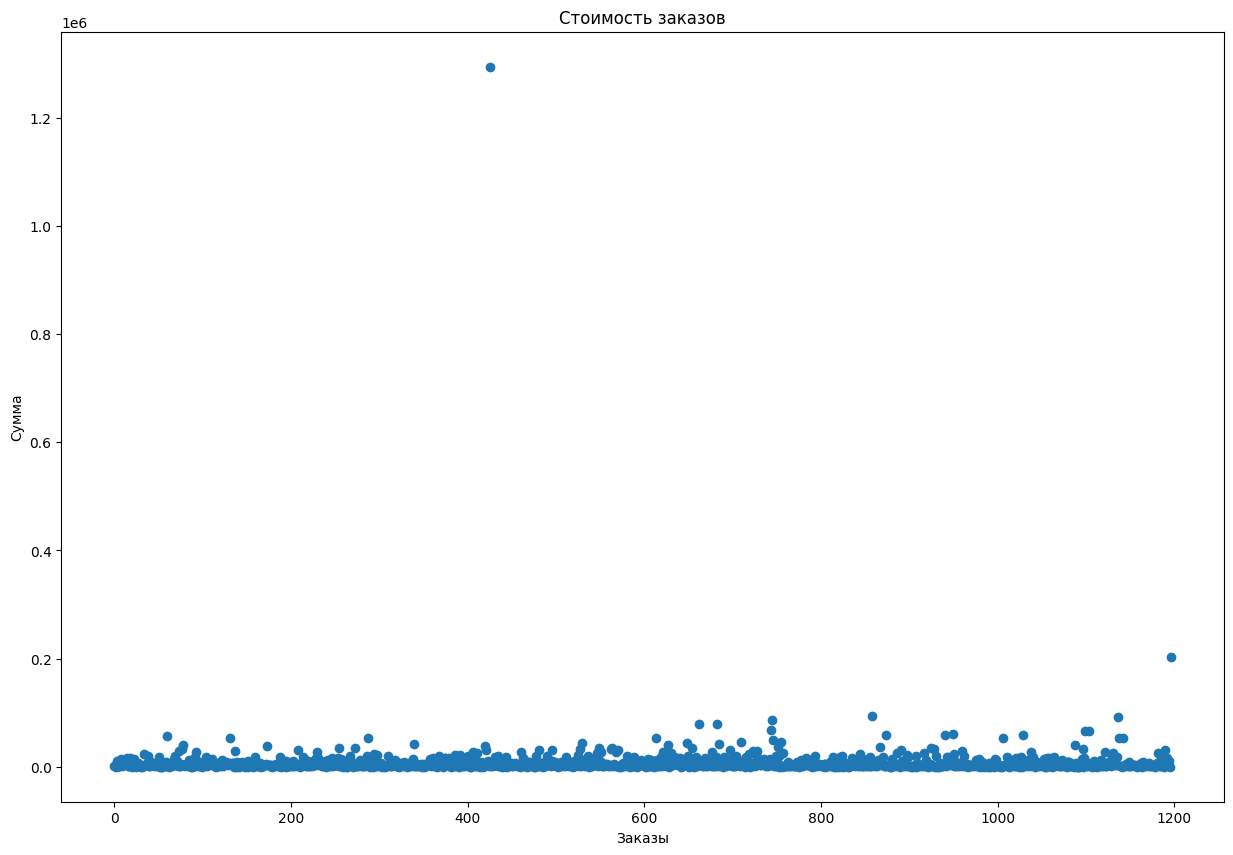

In [30]:
plt.figure(figsize =(15, 10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Стоимость заказов")
plt.xlabel("Заказы")
plt.ylabel("Сумма");

В основном пользователи делают заказы не более чем на 30 000 рублей. Имеется небольшое количество заказов на большие суммы (чем дороже заказ, тем их меньше).

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5 % пользователей совершали заказы на сумму 28000 рублей и не более 1 % на 58233 и больше. Для исключения аномальных значений допустимо избавиться от 5 % данных. Соответственно, в последующем избавимся от заказов на сумму более 28000 рублей.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Нулевая гипотеза: Между группами А и В нет различий в среднем количестве заказов на посетителя.

Альтернативная гипотеза: Между группами А и В есть различия в среднем количестве заказов на посетителя.

Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни. Уровень значимости зададим 0.05

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


Отвергаем нулевую гипотезу. В среднем количестве заказов на посетителя между группами есть статистически значимые различия (P-value меньше 0.05). Среднее группы В больше А на 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: Между группами А и В нет различий в среднем в среднем чеке заказа.

Альтернативная гипотеза: Между группами А и В есть различия в св среднем чеке заказа.

Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни. Уровень значимости зададим 0.05.

In [33]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Нулевая гипотеза подтвердилась. В среднем чеке заказов между группами статистически значимых отличий нет (P-value больше 0.05). Однако, среднее группы В больше А на 25%, что, вероятно обусловлено аномальными заказами.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01334
0.172


Отвергаем нулевую гипотезу. В среднем количестве заказов на посетителя между группами по прежнему есть статистически значимые различия (P-value меньше 0.05). Среднее группы В больше А на 17.2%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [35]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.720
-0.023


Нулевая гипотеза подтвердилась. В среднем чеке заказов между группами статистически значимых отличий по прежнему нет (P-value больше 0.05). Среднее группы В ниже А на 2.3%.

### Выводы

Было принято решение остановить тест и признать его успешным.

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

Нет статистически значимого различия по среднему чеку между группами по сырым данным. Тем не менее по сырым данным группа В больше А на 25%. Однако после фильтрации разницы почти нет.

По графику различия конверсии между группами видно, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

График различия среднего чека колеблется что свидетельствует об аномалиях. Сделать однозначные выводы по графику нельзя. Но расчет статистической значимости различий в среднем чеке между группами указывает на то, что значительных различий нет.